## Exercise 1: Largest numbers
### Problem
Given $m$ numbers from the universe $[n]=\{1,\ldots,n\}$, suppose we want to find the $k$ largest
#### Part 1
In the RAM-model, how would you solve this task? What is your total running time?

In [1]:
from lib.stream import Stream

n = 10
u = 4
stream = Stream(None, n, u)
print(stream)

k = 5
k_largest = [0] * k
for el in stream:
    if el >= k_largest[0]:
        k_largest[0] = el
        for i in range(len(k_largest) - 1):
            if k_largest[i] > k_largest[i + 1]:
                temp = k_largest[i]
                k_largest[i] = k_largest[i + 1]
                k_largest[i + 1] = temp
            else:
                break

print(k_largest)

Stream(elements=[2, 1, 2, 4, 2, 3, 2, 3, 4, 3], n=10, u=4)
[3, 3, 3, 4, 4]


#### Part 2
In the streaming model, how would you solve this task? What is your space usage? What is your running time?

In [2]:
# same

## Exercise 2: Missing numbers
### Problem
#### Part 1
Assume you get $n-1$ different integers from the set $\{1,\ldots,n\}$ in a stream. Can you deduce the missing number using only $O(\log(n))$ space?

In [3]:
import random
import math

n = 10
nums = [i for i in range(1, n + 1)]
nums.remove(random.randint(1, n))

stream = Stream(nums)
print(stream)

sum = 0
for el in stream:
    sum += el

missing = (n ** 2 + n - 2 * sum) / 2

print(missing, missing not in stream)

Stream(elements=[1, 2, 3, 4, 6, 7, 8, 9, 10], n=9, u=10)
5.0 True


#### Part 2
Assume now you only get $n-2$ different integers from the set $\{1,\ldots,n\}$ in a stream. Can you deduce the missing numbers using only $O(\log(n))$ space?

In [4]:
import random
import math

n = 10
nums = [i for i in range(1, n + 1)]
to_remove = random.sample(nums, 2)
nums.remove(to_remove[0])
nums.remove(to_remove[1])

stream = Stream(nums)
print(stream)

sum = 0
prod = 1
for el in stream:
    sum += el
    prod *= el

c = (n ** 2 + n) / 2 - sum
d = math.factorial(n) / prod

b = (c + math.sqrt(c ** 2 - 4 * d)) / 2
a = c - b

print(a, b, a not in stream and b not in stream)


Stream(elements=[1, 2, 3, 5, 6, 7, 8, 9], n=8, u=9)
4.0 10.0 True


## Exercise 3: Reservoir sampling
### Problem
Here $\text{Random}(a)$ is a random number generator that uniformly at random returns an integer between $1$ and $a$ (both included). At the end of the algorithm, the variable $l$ stores the length of the input stream $S$; this number is not known to the algorithm in advance. If $S$ is empty, the output of the algorithm is correctly undefined. In the following, consider an arbitrary non-empty input stream $S$, and let $m$ denote the unknown length of $S$.

In [5]:
#	proc get_one_sample(S):
#		l = 0
#		while S is not empty:
#			x = next item in S
#			l++
#			if random(l) = 1:
#				sample = x (*)
#		
#		return sample

#### Part 1
Prove that the item returned by $\texttt{GetOneSample}(S)$ is chosen uniformly at random from $S$

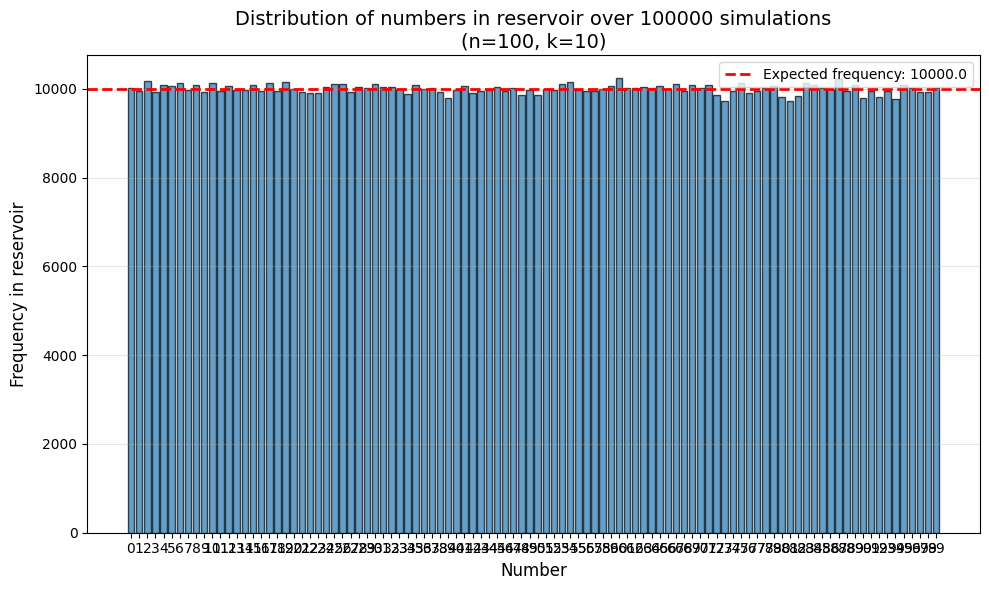

In [6]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from lib.reservoir import Reservoir

n = 100
k = 10
num_simulations = 100000

# Track frequency of each number appearing in the reservoir
frequency_counter: Counter = Counter()
last_index_counter: Counter = Counter()
second_last_index_counter: Counter = Counter()
counts: Counter = Counter()

# Run simulations
for sim in range(num_simulations):
    last_index: int = 0
    second_last_index: int = n
    count: int = 0

    reservoir: Reservoir = Reservoir(n=n, k=k)
    stream: list[int] = [i for i in range(n)]
    for i in range(len(stream)):
        if reservoir.add(stream[i]):
            count += 1
            if last_index:
                second_last_index = last_index
            last_index = i
    
    # Count which numbers are in this reservoir
    for num in reservoir.get_reservoir():
        frequency_counter[num] += 1

    second_last_index_counter[second_last_index] += 1
    last_index_counter[last_index] += 1
    counts[count] += 1

# Prepare data for plotting
numbers: list[int] = list(range(n))
frequencies: list[int] = [frequency_counter[i] for i in numbers]
# Calculate expected frequency (theoretical)
expected_frequency: float = (k / n) * num_simulations

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(numbers, frequencies, alpha=0.7, edgecolor='black')
plt.axhline(y=expected_frequency, color='r', linestyle='--', linewidth=2, 
            label=f'Expected frequency: {expected_frequency:.1f}')

plt.xlabel('Number', fontsize=12)
plt.ylabel('Frequency in reservoir', fontsize=12)
plt.title(f'Distribution of numbers in reservoir over {num_simulations} simulations\n(n={n}, k={k})', fontsize=14)
plt.xticks(numbers)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### Part 2
What is the expected number of times that $\texttt{GetOneSample}(S)$ executes line $(*)$?

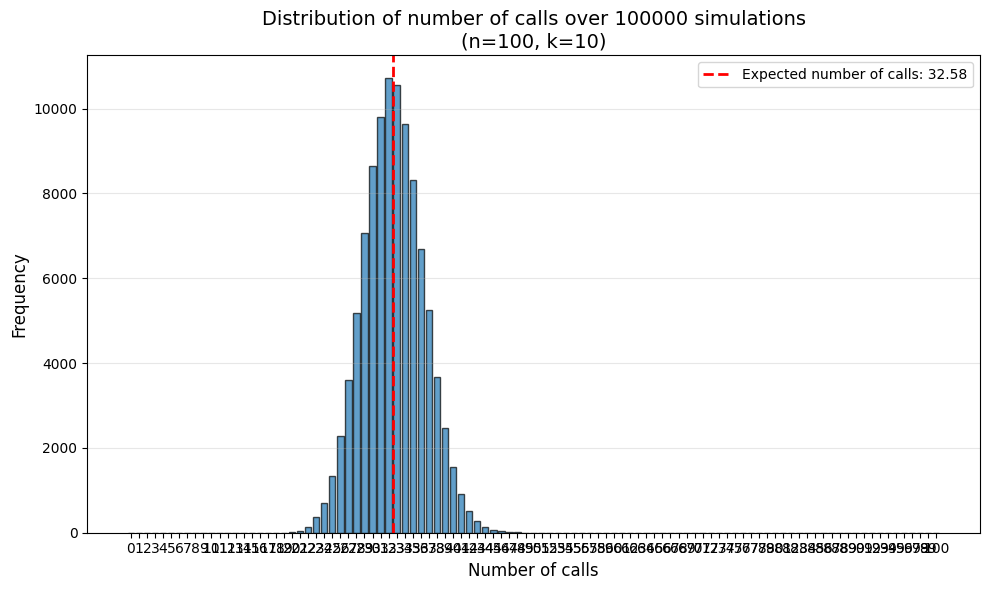

In [7]:
# Create the plot
plt.figure(figsize=(10, 6))
count_values = [i for i in range(n + 1)]
frequencies_count: list[int] = [counts[i] for i in count_values]
mean_count = np.sum([frequencies_count[i] * i for i in range(len(frequencies_count))]) / num_simulations
bars = plt.bar(count_values, frequencies_count, alpha=0.7, edgecolor='black')
plt.axvline(x=mean_count, color='r', linestyle='--', linewidth=2, 
            label=f'Expected number of calls: {mean_count:.2f}')

plt.xlabel('Number of calls', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Distribution of number of calls over {num_simulations} simulations\n(n={n}, k={k})', fontsize=14)
plt.xticks(count_values)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### Part 3
What is the expected number of times that $\texttt{GetOneSample}(S)$ executes line $(*)$ for the last time?

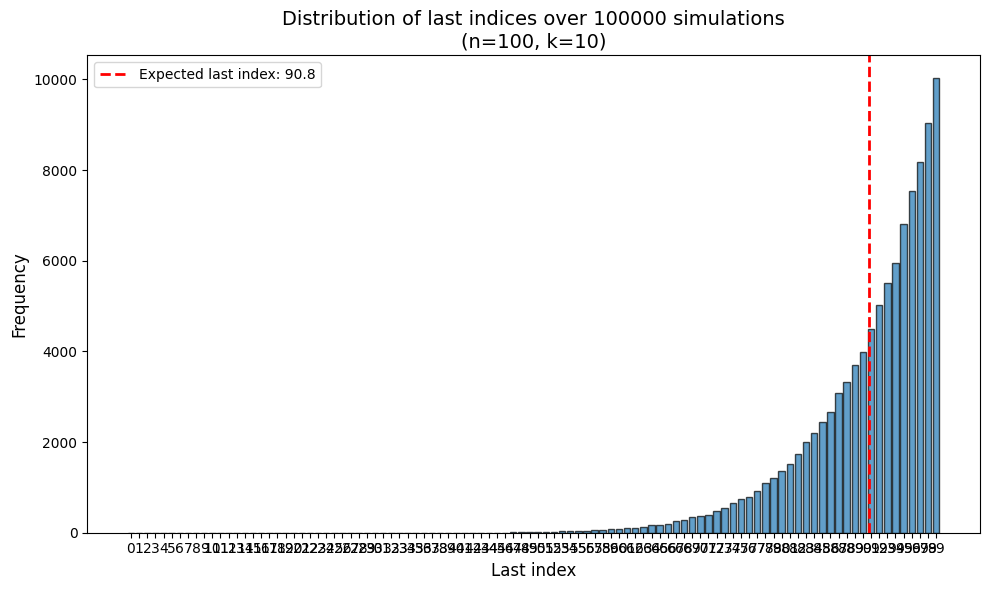

In [8]:
last_indices = [last_index_counter[i] for i in range(n)]
last_index_mean = np.sum([last_indices[i] * i for i in range(len(last_indices))]) / num_simulations

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(n), last_indices, alpha=0.7, edgecolor='black')
plt.axvline(x=last_index_mean, color='r', linestyle='--', linewidth=2, 
            label=f'Expected last index: {last_index_mean:.1f}')
plt.xlabel('Last index', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Distribution of last indices over {num_simulations} simulations\n(n={n}, k={k})', fontsize=14)
plt.xticks(range(n))
plt.legend()
plt.tight_layout()
plt.show()

#### Part 4
What is the expected number of times that $\texttt{GetOneSample}(S)$ executes line $(*)$ for the second last time or the algorithm ends (whichever happens first)?


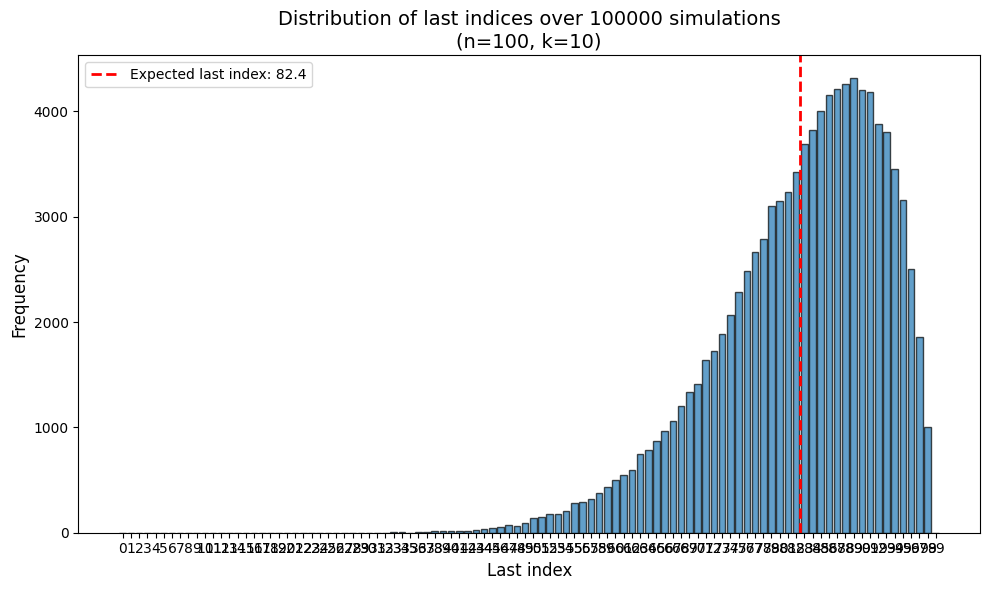

In [9]:
second_last_indices = [second_last_index_counter[i] for i in range(n)]
second_last_index_mean = np.sum([second_last_indices[i] * i for i in range(len(second_last_indices))]) / num_simulations

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(n), second_last_indices, alpha=0.7, edgecolor='black')
plt.axvline(x=second_last_index_mean, color='r', linestyle='--', linewidth=2, 
            label=f'Expected last index: {second_last_index_mean:.1f}')
plt.xlabel('Last index', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Distribution of last indices over {num_simulations} simulations\n(n={n}, k={k})', fontsize=14)
plt.xticks(range(n))
plt.legend()
plt.tight_layout()
plt.show()

#### Part 5
Describe and analyze an algorithm that returns a subset of $k$ items chosen uniformly at random from a data stream of length at least $k$. The integer $k$ is given as part of the input to your algorithm. Prove that your algorithm is correct.
For example, if $k=2$ and the stream contains the sequence $(1,2,3,4)$, the algorithm should return the subset $\{3,1\}$ with probability $\dfrac16$.

## Exercise 4: Frequency
### Problem
Consider the trivial solution to the frequency problem: keeping as many counters are there are colors. What is the space consumption?
### Solution



## Exercise 5: Misra-Gries
### Problem
Run Misra-Gries' algorithm on the following stream with $k=3$.
$$\text{b,a,b,b,a,m,b,a,m,b,a,n,a,n,a,n,a,n,a}$$
What do you output? How large was your largest counter?
### Solution


In [10]:
from lib.misra_gries import misra_gries

k = 3
stream = Stream('babbambambanananana')
stream.print_frequencies()
stream.print_heavy_hitters(k=k);

print(f"\nMisra-gries with k={k}")
estimated_heavy_hitters = misra_gries(stream, k=k)
for el, freq in estimated_heavy_hitters.items():
    print(f"Element: {el}, Frequency: {freq}")


Frequencies:
Element: a, Frequency: 8
Element: b, Frequency: 5
Element: n, Frequency: 4
Element: m, Frequency: 2

Heavy hitters with k=3:
Element: a, Frequency: 8

Misra-gries with k=3
Element: a, Frequency: 3
Element: n, Frequency: 1


## Exercise 6: Tightness of Misra-Gries
### Problem
Given $k$ and $m$, design a stream of length $m$ that contains some character $\dfrac mk$ times, yet this character is not output by Misra-Gries' algorithm.
### Solution


In [11]:
k = 3
stream = Stream('abcabcabcabcabc')
stream.print_frequencies()
stream.print_heavy_hitters(k=k);

print(f"\nMisra-gries with k={k}:")
estimated_heavy_hitters = misra_gries(stream, k=k)
for el, freq in estimated_heavy_hitters.items():
    print(f"Element: {el}, Frequency: {freq}")


Frequencies:
Element: a, Frequency: 5
Element: b, Frequency: 5
Element: c, Frequency: 5

Heavy hitters with k=3:

Misra-gries with k=3:


## Exercise 7
### Problem
Let $\hat m$ be the sum of all counters maintained by the Misra-Gries algorithm after it has processed an input stream, i.e.:
$$\hat m=\sum_{l\in\text{keys}(A)}A[l]$$
Prove that:
$$f_j-\dfrac{m-\hat m}k\le\hat f_j\le f_j$$
### Solution


## Exercise 8: Merging two streams
### Problem
Suppose we have run the (one-pass) Misra-Gries algorithm on two streams $\sigma_1$ and $\sigma_2$, thereby obtaining a summary for each stream consisting of $k-1$ counters. Let $m_i$ denote the length of the stream $\sigma_i$. Consider the following algorithm for merging these two summaries to produce a single $k-1$-counter summary.

In [12]:
# proc merge_streams(a, b, k):
# 	combine the two sets of coutners, adding up counts for any common items
# 	if more than k-1 counters remain:
# 		c = value of k-th counter, based on decreasing order of value
# 		reduce each counter by c
# 		delete all keys with non-positive counters

Prove that the resulting summary is good for the combined stream $\sigma_1\circ\sigma_2$ in the sense that frequency estimates from it satisfy the bounds given for Misra-Gries, namely:
$$f_j-\dfrac mk\le\hat f_j\le f_j$$
where $m=m_1+m_2$ is the length of the combined stream.
### Solution

In [17]:
from lib.misra_gries import merge_streams

stream1 = Stream('abcdbacdbcbdbdbbdcabdbdbbdbcabdbcabdbdbdacddbac')
stream2 = Stream('abbdbbcdbabbcbdbbbabcbbdbbacbbdabbcbbbdbacbbacb')

k = 3
est1 = misra_gries(stream=stream1, k=k)
est2 = misra_gries(stream=stream2, k=k)

est_merge = merge_streams(a=est1, b=est2, k=k)
print(est_merge)

stream1.print_frequencies()
stream2.print_frequencies()
merged_stream = stream1 + stream1
merged_stream.print_frequencies()
est = misra_gries(stream=merged_stream, k=k)
print(est)

{'b': 21, 'd': 1}

Frequencies:
Element: b, Frequency: 18
Element: d, Frequency: 14
Element: c, Frequency: 8
Element: a, Frequency: 7

Frequencies:
Element: b, Frequency: 27
Element: a, Frequency: 7
Element: c, Frequency: 7
Element: d, Frequency: 6

Frequencies:
Element: b, Frequency: 36
Element: d, Frequency: 28
Element: c, Frequency: 16
Element: a, Frequency: 14
{'b': 8, 'd': 2}
